In [1]:
import sys
import os
import numpy as np
import pandas as pd
import argparse
from pathlib import Path
import glob
import pickle

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import datetime
import imp
from scipy.stats import spearmanr,pearsonr, ttest_ind, ttest_rel

sys.path.append('../code')

In [2]:
import data_support
imp.reload(data_support)
from data_support import get_data

## Loading model fits

### Mean Model

In [3]:
fitted_filenames1 = glob.glob('../results/model_fits/experiment1_mean_mb_mf_sticky/*')
print(len(fitted_filenames1))

fitted_filenames2 = glob.glob('../results/model_fits/experiment2_mean_mb_mf_sticky/*')
print(len(fitted_filenames2))

fitted_filenames = fitted_filenames1+fitted_filenames2
print(len(fitted_filenames))

253
539
792


In [4]:
model_name='mean_mb_mf_sticky'
rows = []
for filename in fitted_filenames:
    
    ID = os.path.basename(filename).replace('.pkl','')
    
    # load fits 
    with open(filename, 'rb') as f:
        fit_results = pickle.load(f)
    row = list(fit_results['params'])
    row.append(fit_results['nllk'])
    row.append(ID)
    rows.append(row)
    
params_df_mean_mb_mf_sticky_flex3 = pd.DataFrame(rows,columns=[param_name+\
                                                               model_name for param_name in fit_results['param_names']]+\
                                                                    ['nllk_mean_mb_mf_sticky',
                                                                     'ID'])

params_df_mean_mb_mf_sticky_flex3['bic_mean_mb_mf_sticky'] = 2*params_df_mean_mb_mf_sticky_flex3['nllk_mean_mb_mf_sticky'] +\
                                                                   len(fit_results['params'])*np.log(400)
params_df_mean_mb_mf_sticky_flex3.head()

,alphamean_mb_mf_sticky,beta_stage2mean_mb_mf_sticky,beta_MBmean_mb_mf_sticky,beta_MF1mean_mb_mf_sticky,beta_stickymean_mb_mf_sticky,nllk_mean_mb_mf_sticky,ID,bic_mean_mb_mf_sticky
0,0.160605,13.370435,2.973740,0.982665,1.614136,194.299614,3AMW0RGHOD2203DJHGT0YYGGNRTNP8,418.556551
1,0.230012,15.492326,18.962669,1.946735,0.830079,173.035820,3UN61F00HWPJMRNSQ8139CG9X5XR5S,376.028964
2,0.556841,5.643271,0.562885,3.191395,2.285878,163.406210,3I02618YA06FVTXSEH5MCT8AV42PUG,356.769743
3,0.028327,8.713629,0.219677,0.077240,0.004114,271.252079,33F859I566D8MDQYVDGMYUEVKXZBH4,572.461481
4,0.121861,13.189072,1.573154,1.567337,0.772067,228.695939,33L7PJKHCGYFPOJMSVD1LBRIMJM8TK,487.349202


### CVaR Model

In [5]:
fitted_filenames1 = glob.glob('../results/model_fits/experiment1_dcvar_mb_mf_sticky/*')
print(len(fitted_filenames1))

fitted_filenames2 = glob.glob('../results/model_fits/experiment2_dcvar_mb_mf_sticky/*')
print(len(fitted_filenames2))

fitted_filenames = fitted_filenames1+fitted_filenames2
print(len(fitted_filenames))

253
539
792


In [6]:
model_name='dcvar_mb_mf_sticky'
rows = []
for filename in fitted_filenames:
    
    ID = os.path.basename(filename).replace('.pkl','')
    
    # load fits 
    with open(filename, 'rb') as f:
        fit_results = pickle.load(f)
    row = list(fit_results['params'])
    row.append(fit_results['nllk'])
    row.append(ID)
    rows.append(row)
    
params_df_dcvar_mb_mf_sticky_flex3 = pd.DataFrame(rows,columns=[param_name+\
                                                                model_name for param_name in fit_results['param_names']]+\
                                                                    [ 'nllk_'+model_name,
                                                                     'ID'])

params_df_dcvar_mb_mf_sticky_flex3['bic_'+model_name] = 2*params_df_dcvar_mb_mf_sticky_flex3['nllk_'+model_name] +\
                                                        len(fit_results['param_names'])*np.log(400)

params_df_dcvar_mb_mf_sticky_flex3.head()

,alphadcvar_mb_mf_sticky,beta_stage2dcvar_mb_mf_sticky,beta_MBdcvar_mb_mf_sticky,beta_MF1dcvar_mb_mf_sticky,beta_stickydcvar_mb_mf_sticky,etadcvar_mb_mf_sticky,cvar_alphadcvar_mb_mf_sticky,nllk_dcvar_mb_mf_sticky,ID,bic_dcvar_mb_mf_sticky
0,0.607926,10.847257,6.038488,11.990610,3.129645,0.034902,0.831183,123.691793,31Z0PCVWUKFBPAE3IQLV7BVNBSM7TO,289.323837
1,0.551742,6.492055,5.821220,0.395879,0.448700,0.005959,0.795040,221.424757,3K9FOBBF2HJC9IYLPO0THH7WIYDNLT,484.789766
2,0.231682,14.044340,1.428430,7.241022,0.302696,0.002835,0.106194,132.800610,3E337GFOL98WNQKKEX3D4P2OLDKNG7,307.541471
3,0.545719,5.131154,0.001959,1.947490,0.353410,0.004007,0.105270,231.091183,3VE8AYVF8MX56J1LXB8C47CHW7N8FG,504.122618
4,0.312117,19.457899,26.014501,3.451612,0.854715,0.024268,0.137471,125.193571,3KKG4CDWKIYVM8N6IMI7DZA1R8L498,292.327393


### Merging dataframes

In [7]:
params_df_combined = pd.merge(params_df_mean_mb_mf_sticky_flex3,
                              params_df_dcvar_mb_mf_sticky_flex3,on='ID',how='outer')


## (Panel a) Plot BIC between models

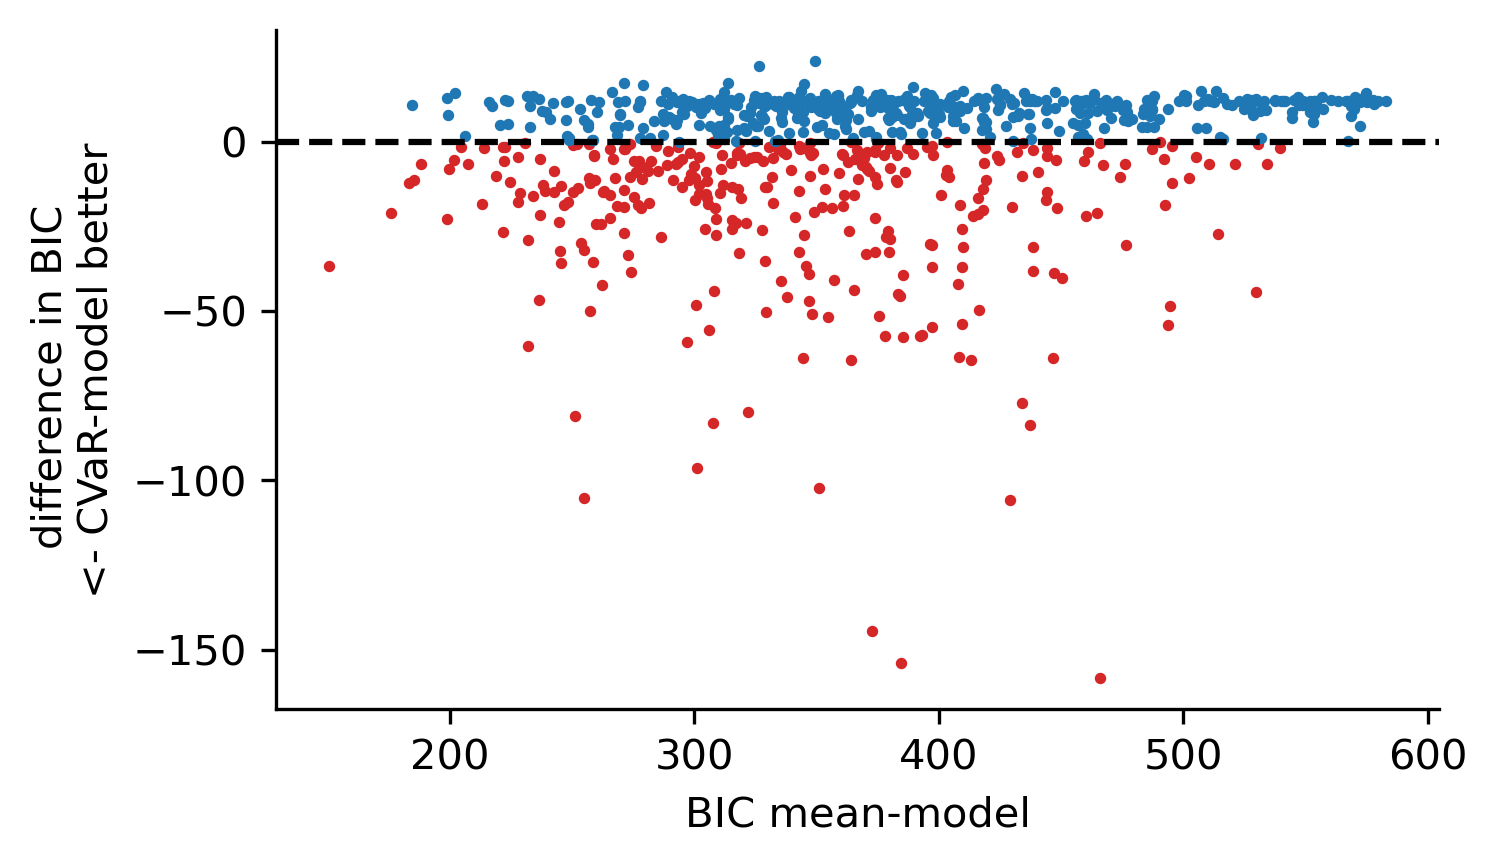

In [8]:
model1 = 'mean_mb_mf_sticky'
model2 = 'dcvar_mb_mf_sticky'
param1 = 'bic_'+model1
param2 = 'bic_'+model2

# select data 
x = params_df_combined[param1]
y = params_df_combined[param2]

# set up plot 
plt.figure(figsize=(5,3),dpi=300)
fs = 10

# color by model fit 
sel = (params_df_combined['bic_mean_mb_mf_sticky']-params_df_combined['bic_dcvar_mb_mf_sticky'])>0
plt.scatter(x[sel],(y-x)[sel],s=3,color=sns.color_palette()[3])
plt.scatter(x[~sel],(y-x)[~sel],s=3,color=sns.color_palette()[0])

plt.axhline(y=0,c='k',linestyle='--')

# style 
plt.ylabel('difference in BIC \n'+
           '<- CVaR-model better',fontsize=fs)
plt.xlabel('BIC mean-model',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
sns.despine()

In [9]:
# average BICs
dcvar = params_df_combined['bic_dcvar_mb_mf_sticky']
mean = params_df_combined['bic_mean_mb_mf_sticky']
print(np.mean(dcvar))
print(np.mean(mean))

368.84028532888806
371.51920322960086


In [10]:
# t-test 
ttest_rel(dcvar,mean)

Ttest_relResult(statistic=-3.543572987155477, pvalue=0.0004178976213469975)

In [11]:
# number of participants 
len(dcvar)

792

In [12]:
# proporption better fit by cvar model 
np.mean(dcvar<mean)

0.4027777777777778

In [13]:
# numbers better fit 
print(np.sum(dcvar<mean))
print(np.sum(dcvar>mean))
print(np.sum(dcvar==mean))

319
473
0


## (Panel b) Plotting parameters

In [14]:
plot_convert = {}
plot_convert['alpha']=r'$\lambda$'
plot_convert['beta_stage2']=r'$\beta^{2nd}$'
plot_convert['beta_MB']=r'$\beta^{MB}$'
plot_convert['beta_MF1']=r'$\beta^{MF}$'
plot_convert['beta_sticky']=r'$\beta^{sticky}$'
plot_convert['eta']=r'$\eta^2$'
plot_convert['cvar_alpha']=r'$\alpha$'
plot_convert['dcvar_mb_mf_sticky']='CVaR-model'
plot_convert['mean_mb_mf_sticky']='mean-model'

### CVaR alpha

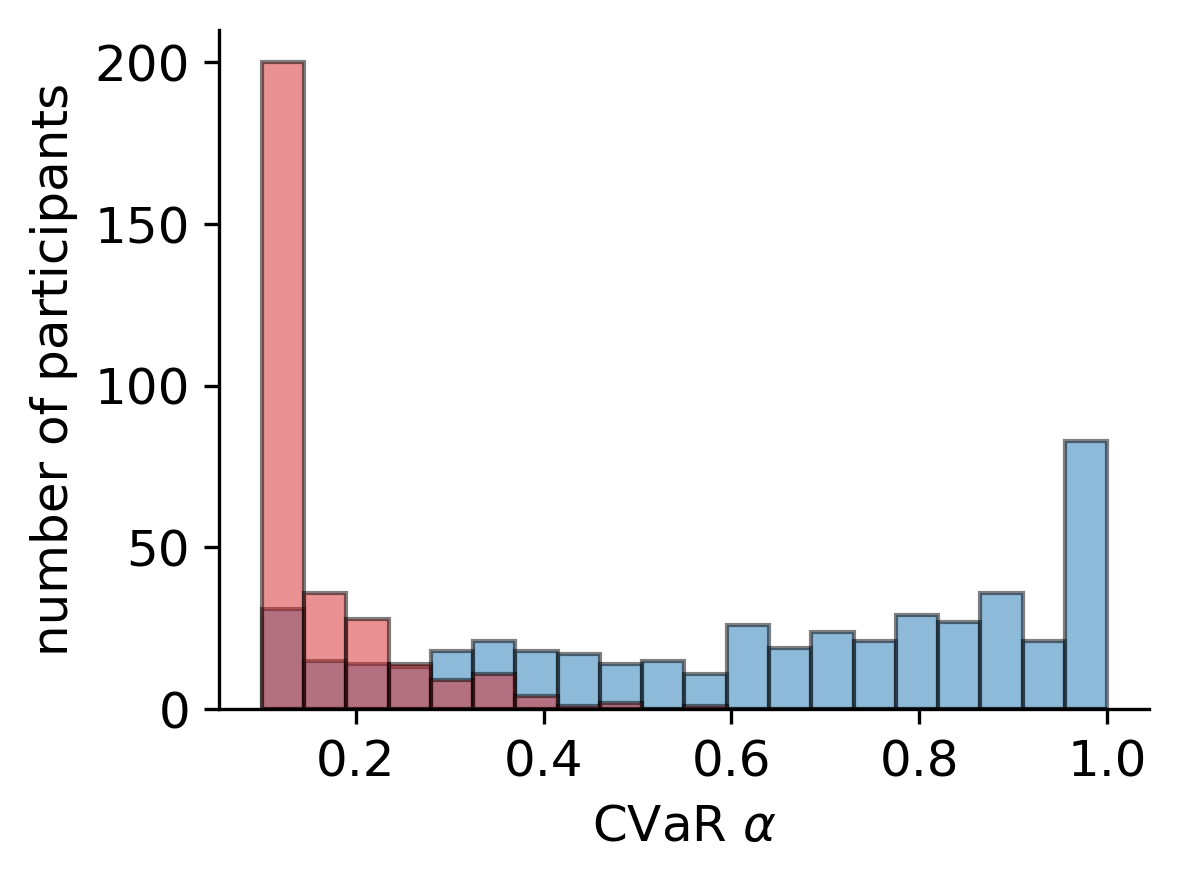

In [15]:
model_name='dcvar_mb_mf_sticky'
param='cvar_alpha'

# select data 
x = params_df_combined[param+model_name]

# set up plot 
plt.figure(figsize=(4,3),dpi=300)
fs = 12

# color by model fit
sel = (params_df_combined['bic_mean_mb_mf_sticky']-params_df_combined['bic_dcvar_mb_mf_sticky'])>0

tmp = plt.hist(x[~sel],ec='k',bins=20,alpha=0.5,color=sns.color_palette()[0])
plt.hist(x[sel],ec='k',bins=tmp[1],alpha=0.5,color=sns.color_palette()[3])

# style 
plt.ylabel('number of participants',fontsize=fs)
plt.xlabel(r'CVaR $\alpha$',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

sns.despine()

In [16]:
# percent of participants with alphas less than 0.44
print(model_name)
print(param)
x = params_df_combined[param+model_name]
print(np.mean(x<0.44))

dcvar_mb_mf_sticky
cvar_alpha
0.5757575757575758


## (Panel c,d) Plotting Shift in Parameters

In [17]:
def plot_scatter_compare_models(model1,model2,param1,param2,sel=None,outlier=None,include_reg=False):

    # select data 
    x = params_df_combined[param1+model1]
    y = params_df_combined[param2+model2]

    # sub-select participants 
    if sel is not None:
        x = x[sel]
        y = y[sel]
        color=sns.color_palette()[3]
    else:
        color='k'

    # outlier removal 
    if outlier is not None:
        sel2 = np.logical_and(np.abs(x)<outlier,np.abs(y)<outlier)
        x = x[sel2]
        y = y[sel2]
        
    # set up plot
    plt.figure(figsize=(4,3),dpi=300)
    fs = 12

    # plot 
    plt.scatter(x,y,s=3,color=color)  
    if include_reg:
        sns.regplot(x,y,marker="None",color=color)

    # print correlation 
    isnans = np.logical_or(np.isnan(y),np.isnan(x))
    x = x[~isnans]
    y = y[~isnans]
    print(spearmanr(x,y))
    
    # print t-test
    print(ttest_rel(x,y))
    print('mean diff:'+str(np.mean(x)-np.mean(y)))
    
    # style 
    ylims =  plt.ylim()
    xlims =  plt.xlim()
    points = [np.min([xlims[0],ylims[0]]),np.max([xlims[1],ylims[1]])]
    plt.plot(points,points,color='k',linestyle='--')
    plt.xlabel(plot_convert[param1]+' '+plot_convert[model1],fontsize=fs)
    plt.ylabel(plot_convert[param2]+' '+plot_convert[model2],fontsize=fs)
    plt.xticks(fontsize=fs)
    plt.yticks(fontsize=fs)
    sns.despine()

### learning rate 

SpearmanrResult(correlation=0.7242266516827349, pvalue=4.146781709217346e-53)
Ttest_relResult(statistic=-15.803394932953939, pvalue=6.342444608128887e-42)
mean diff:-0.11862325580128497


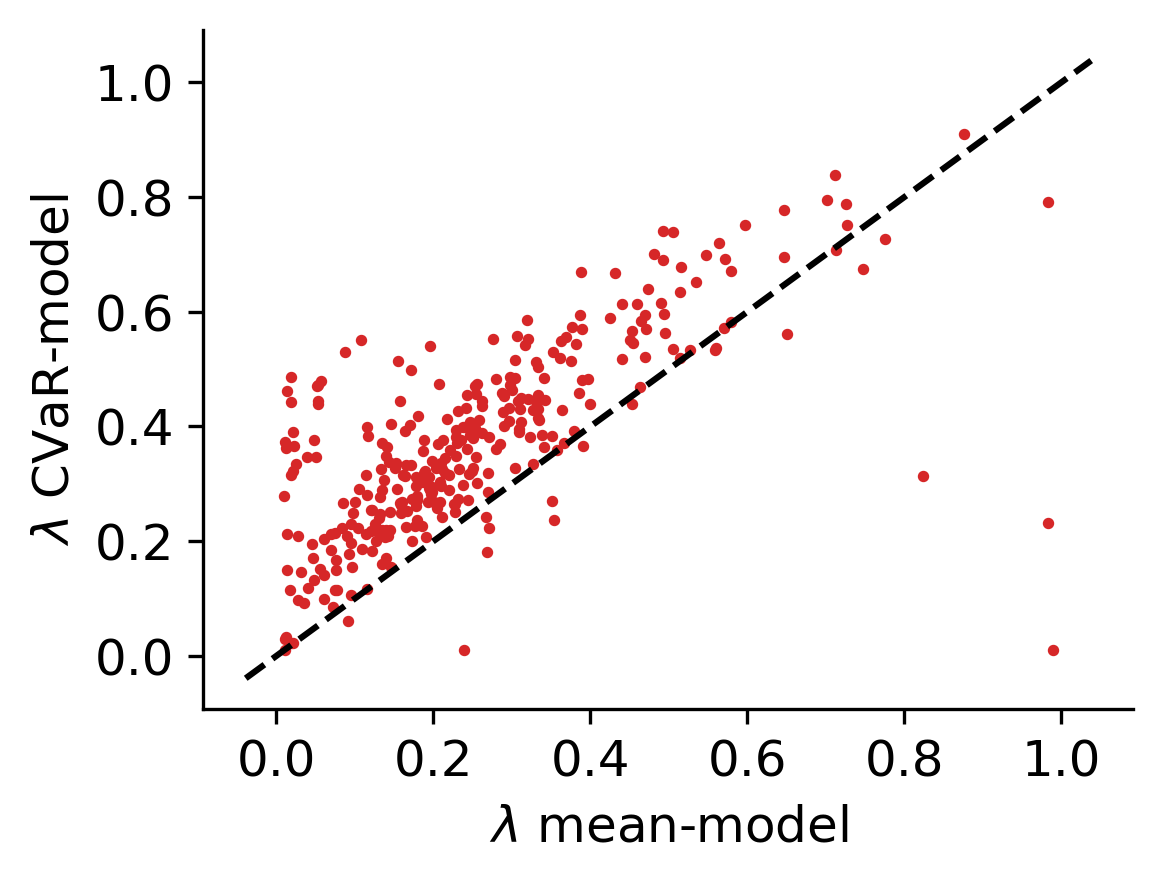

In [18]:
model1='mean_mb_mf_sticky'
model2='dcvar_mb_mf_sticky'
param1=param2='alpha'
sel = (params_df_combined['bic_mean_mb_mf_sticky']-params_df_combined['bic_dcvar_mb_mf_sticky'])>0
plot_scatter_compare_models(model1,model2,param1,param2,sel=sel)

### beta sticky

SpearmanrResult(correlation=0.9479095954957472, pvalue=1.4857529387955185e-158)
Ttest_relResult(statistic=21.049088630552195, pvalue=4.307754392884971e-62)
mean diff:0.38281811436841573


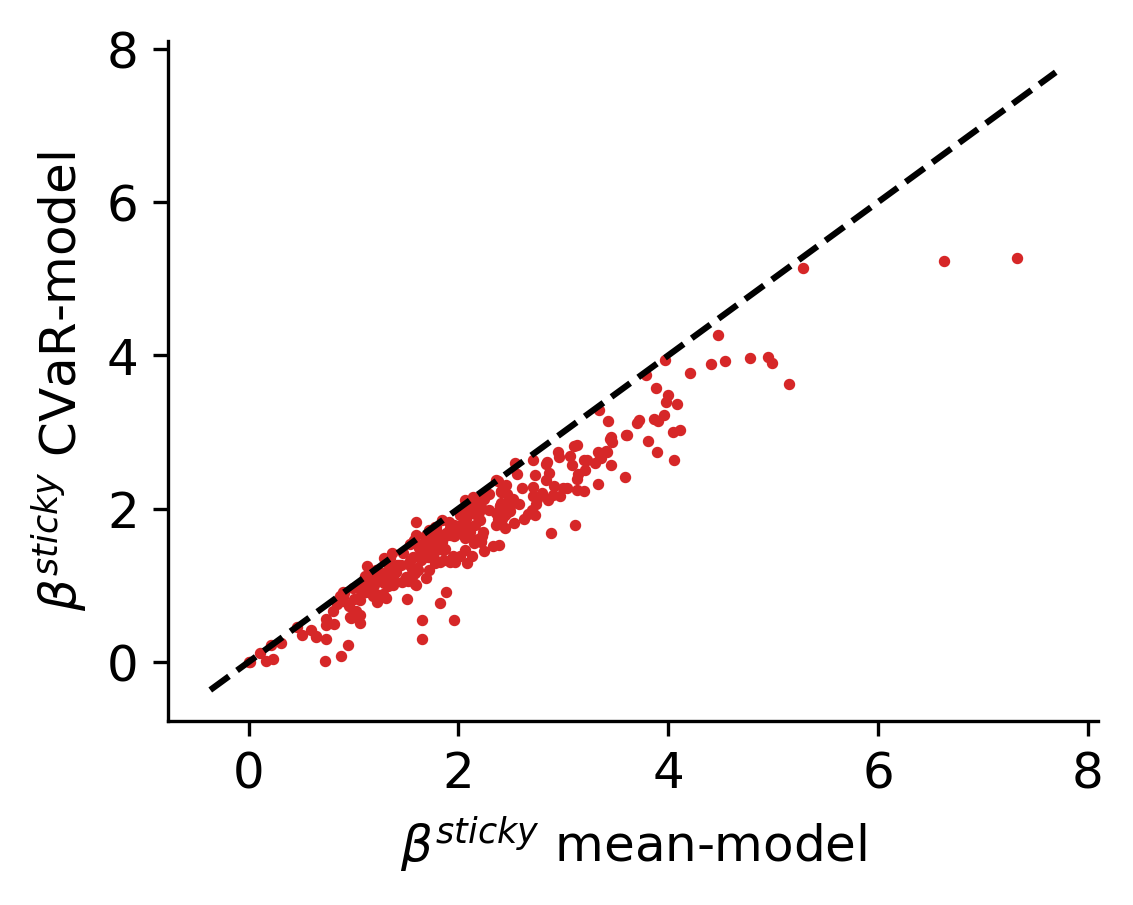

In [19]:
model1='mean_mb_mf_sticky'
model2='dcvar_mb_mf_sticky'
param1=param2='beta_sticky'
sel = (params_df_combined['bic_mean_mb_mf_sticky']-params_df_combined['bic_dcvar_mb_mf_sticky'])>0
plot_scatter_compare_models(model1,model2,param1,param2,sel=sel,outlier=10)

### beta sticky, with outliers

SpearmanrResult(correlation=0.9488828591707578, pvalue=8.176035989594398e-161)
Ttest_relResult(statistic=14.662506501229378, pvalue=1.5249285672477943e-37)
mean diff:0.4103444415661248


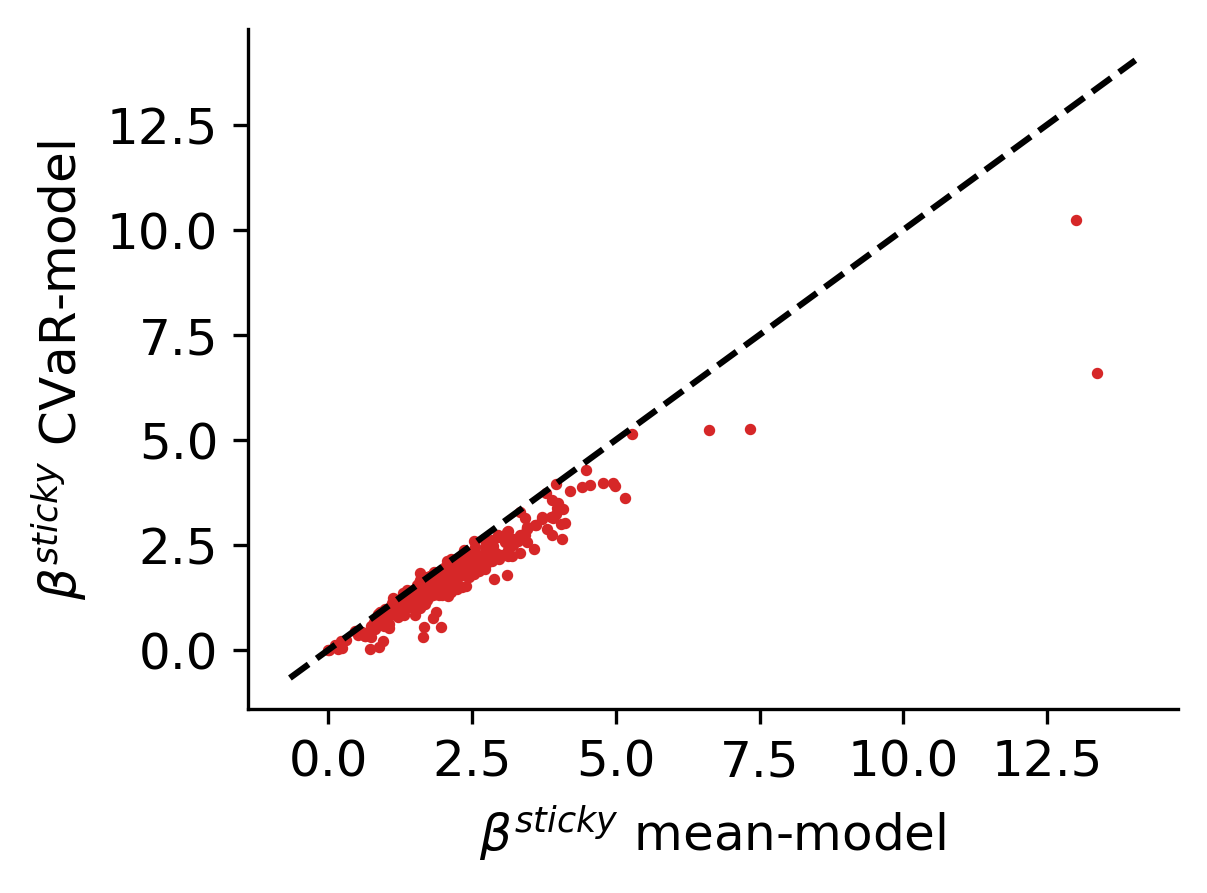

In [20]:
plot_scatter_compare_models(model1,model2,param1,param2,sel=sel)